                                            ||||last stable version—— 29 March 2022||||
    
This notebook is a all-in-one solution for the following ML algorithms (regression)— 
                {   
                    Linear Regression
                    Random Forest Regression
                    Support Vector Machines
                    Ada Boost Regression
                    MLP Regressor 
                    Gaussian Process Regressor
                    Gradient Boosting Regressor
                    Decision Tree Regressor
                    Hist Gradient Boosting Regressor
                    XGBoost Regressor
                }
                
    --> Exclusive train and test data are used. (No cross validation)
    --> Various error metrics are calculated on both train and test data.
    --> The number of regressors in Random Forest Regression, AdaBoost are tuned.
    --> The number of iterations in MLP Regression is tuned.
    --> The hyperparameters (c & gamma) in SVM are tuned by Grid Search CV.
    --> The actual versus predicted values are printed for both train and test data and saved as 300dpi images.

In [1]:
# Import all basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import all the libraries needed for regression, test-train split and data tranformation 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [3]:
# Import the accuracy testing metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error ### MSLE cannot be used when targets contains negative values
from sklearn.metrics import median_absolute_error

In [4]:
# Import the dataset
df = pd.read_csv('ML_Battery_Data.txt', delimiter ="\t")

In [5]:
df.head()

,SC(g/L),pH,T©,PD(%),Zn(g/L),Mn(g/L)
0,28,1.8,32.5,9,9.4,11.4
1,36,1.8,32.5,9,9.1,10.9
2,28,2.2,32.5,9,7.9,10.7
3,36,2.2,32.5,9,6.4,10.6
4,28,1.8,37.5,9,8.2,11.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SC(g/L)  29 non-null     int64  
 1   pH       29 non-null     float64
 2   T©       29 non-null     float64
 3   PD(%)    29 non-null     int64  
 4   Zn(g/L)  29 non-null     float64
 5   Mn(g/L)  29 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.5 KB


In [7]:
df.describe()

,SC(g/L),pH,T©,PD(%),Zn(g/L),Mn(g/L)
count,29.00000,29.000000,29.00000,29.00000,29.000000,29.000000
mean,32.00000,2.000000,35.00000,10.00000,7.517241,10.417241
std,3.70328,0.185164,2.31455,0.92582,1.794649,0.793756
min,24.00000,1.600000,30.00000,8.00000,4.600000,9.100000
25%,28.00000,1.800000,32.50000,9.00000,6.000000,9.700000
50%,32.00000,2.000000,35.00000,10.00000,7.300000,10.500000
75%,36.00000,2.200000,37.50000,11.00000,9.100000,10.900000
max,40.00000,2.400000,40.00000,12.00000,10.300000,12.500000


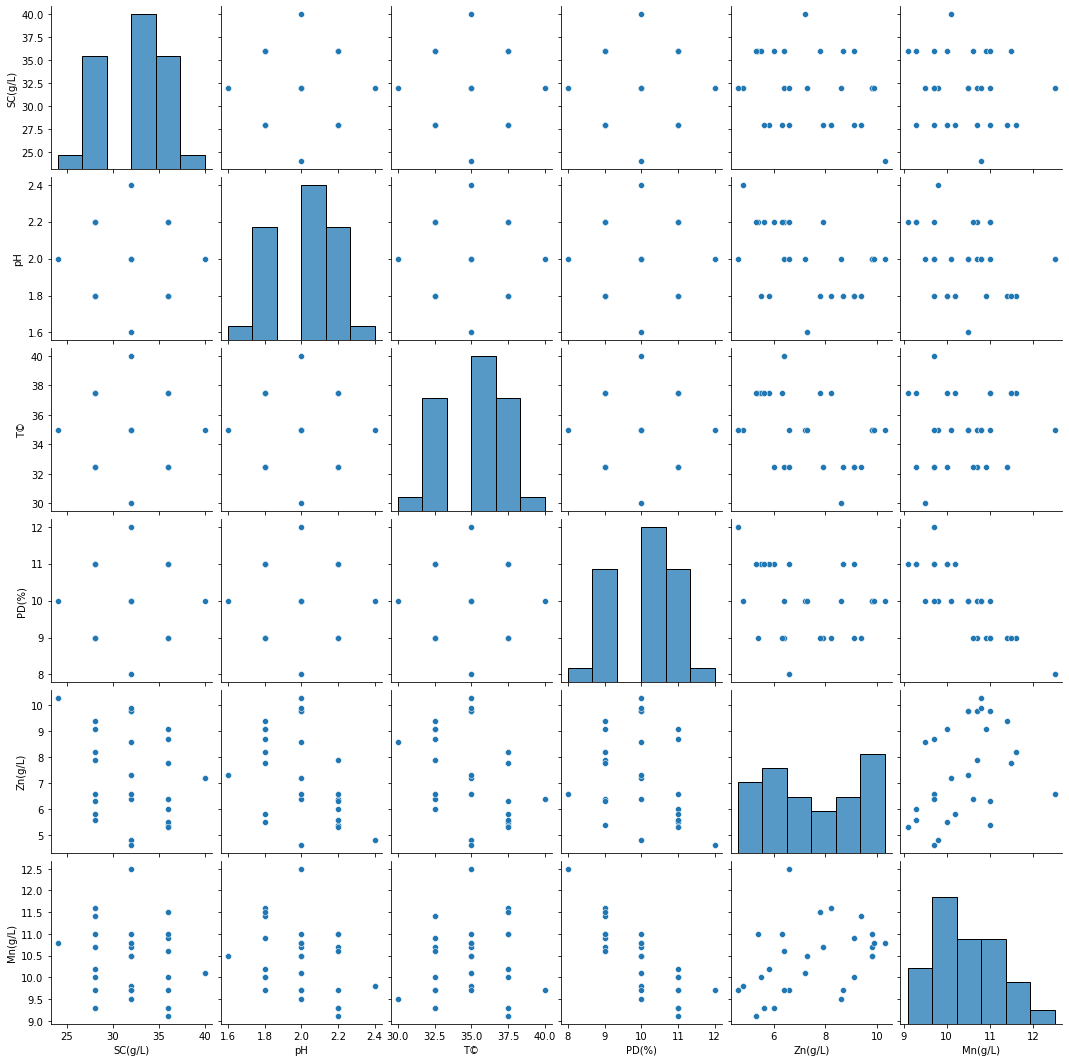

In [8]:
# Plot basic input-ouput mapping
# sns.pairplot(df, kind='scatter',corner=True,plot_kws=dict(marker="*", linewidth=3), diag_kws=dict(fill=False));
sns.pairplot(df, kind='scatter')
plt.savefig('PAIRPLOT-ND.png', dpi=300) 

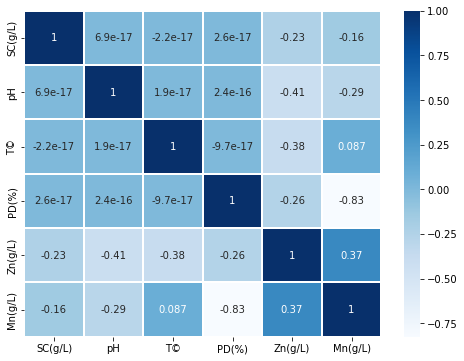

In [9]:
# Plot linear corelation of input-ouput
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,linewidths=2, cmap='Blues')
plt.savefig('HEATMAP-ND.png', dpi=300)       #### for saving the figure.

# Let's do some regression

In [10]:
df.head()

,SC(g/L),pH,T©,PD(%),Zn(g/L),Mn(g/L)
0,28,1.8,32.5,9,9.4,11.4
1,36,1.8,32.5,9,9.1,10.9
2,28,2.2,32.5,9,7.9,10.7
3,36,2.2,32.5,9,6.4,10.6
4,28,1.8,37.5,9,8.2,11.6


In [11]:
# Define the inputs & outputs # Segregate the test & train datasets
y = df['Zn(g/L)']
X = df[['SC(g/L)','pH','T©','PD(%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [12]:
# Carry out the data transformation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Print the test dataset in transformed form
print(X_test)

[[-0.04092728 -0.04092728  0.04092728  0.04092728]
 [-0.04092728 -0.04092728  0.04092728  0.04092728]
 [-1.10503644 -1.10503644  1.10503644  1.10503644]]


In [14]:
# Print the test dataset in actual form
print(sc.inverse_transform(X_test))

[[32.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [28.   1.8 37.5 11. ]]


# Linear Regression

In [15]:
# Train the model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
# Print the intercept and the coefficients
print(lm.intercept_)
list(zip(['x','y','z'],lm.coef_))

7.407692307692308


[('x', -0.5037514297176523),
 ('y', -0.8248337762802777),
 ('z', -0.6161211448788211)]

In [17]:
# Compute and print the training inputs, outputs and output predictions
lm_pred_train = lm.predict(X_train)
print((sc.inverse_transform(X_train)), y_train, lm_pred_train)

[[32.   2.  30.  10. ]
 [28.   1.8 32.5 11. ]
 [36.   1.8 32.5 11. ]
 [32.   2.4 35.  10. ]
 [28.   1.8 32.5  9. ]
 [32.   2.  35.  10. ]
 [36.   1.8 37.5 11. ]
 [36.   2.2 37.5 11. ]
 [36.   2.2 32.5 11. ]
 [32.   2.  35.  10. ]
 [36.   1.8 32.5  9. ]
 [28.   1.8 37.5  9. ]
 [36.   1.8 37.5  9. ]
 [28.   2.2 32.5  9. ]
 [32.   2.  35.   8. ]
 [36.   2.2 32.5  9. ]
 [32.   2.  40.  10. ]
 [32.   2.  35.  12. ]
 [24.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [32.   1.6 35.  10. ]
 [36.   2.2 37.5  9. ]
 [28.   2.2 32.5 11. ]
 [28.   2.2 37.5 11. ]
 [40.   2.  35.  10. ]
 [28.   2.2 37.5  9. ]] 22     8.6
8      9.1
9      8.7
21     4.8
0      9.4
26     9.8
13     5.5
15     5.3
11     6.0
17     9.8
1      9.1
4      8.2
5      7.8
2      7.9
24     6.6
3      6.4
23     6.4
25     4.6
18    10.3
28     9.9
20     7.3
7      5.4
10     6.6
14     5.6
19     7.2
6      6.3
Name: Zn(g/L), dtype: float64 [8.73217054 9.07635659 8.00426357 5.66550388 9.90426357 7.42093023
 6.69302326 4.9375

In [18]:
# Compute and print the testing inputs, outputs and output predictions
lm_pred_test = lm.predict(X_test)
print((sc.inverse_transform(X_test)), y_test, lm_pred_test)

[[32.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [28.   1.8 37.5 11. ]] 27    9.8
16    9.8
12    5.8
Name: Zn(g/L), dtype: float64 [7.42093023 7.42093023 7.76511628]


In [19]:
# Compute and print the error metrics on training data
LR_Train_R2 = r2_score (y_train, lm_pred_train)
LR_Train_EVS = explained_variance_score (y_train, lm_pred_train)
LR_Train_MSE = mean_squared_error(y_train, lm_pred_train)
LR_Train_RMSE = np.sqrt(mean_squared_error(y_train, lm_pred_train))
LR_Train_MAE = mean_absolute_error (y_train, lm_pred_train)
LR_Train_MaxError = max_error (y_train, lm_pred_train)
LR_Train_MSLE = mean_squared_log_error (y_train, lm_pred_train)
LR_Train_MedAE = median_absolute_error (y_train, lm_pred_train)

print(LR_Train_R2,LR_Train_EVS,LR_Train_MSE,LR_Train_RMSE,LR_Train_MAE,LR_Train_MaxError,LR_Train_MSLE,LR_Train_MedAE)

0.518848306216205 0.518848306216205 1.4156678592725105 1.189818414411422 0.9087954680977937 2.479069767441861 0.019212560109427766 0.6071705426356586


In [20]:
# Compute and print the error metrics on testing data
LR_Test_R2 = r2_score (y_test, lm_pred_test)
LR_Test_EVS = explained_variance_score (y_test, lm_pred_test)
LR_Test_MSE = mean_squared_error(y_test, lm_pred_test)
LR_Test_RMSE = np.sqrt(mean_squared_error(y_test, lm_pred_test))
LR_Test_MAE = mean_absolute_error (y_test, lm_pred_test)
LR_Test_MaxError = max_error (y_test, lm_pred_test)
LR_Test_MSLE = mean_squared_log_error (y_test, lm_pred_test)
LR_Test_MedAE = median_absolute_error (y_test, lm_pred_test)

print(LR_Test_R2,LR_Test_EVS,LR_Test_MSE,LR_Test_RMSE,LR_Test_MAE,LR_Test_MaxError,LR_Test_MSLE,LR_Test_MedAE)

-0.4232776162790697 -0.17949702541914503 5.0605426356589165 2.249564988094124 2.24108527131783 2.3790697674418615 0.06275735145527361 2.3790697674418615


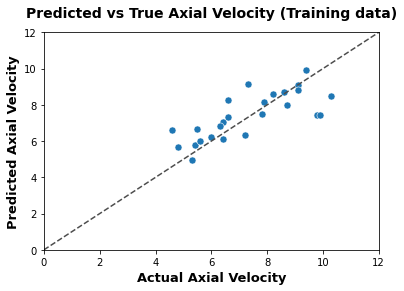

In [21]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_train, y=lm_pred_train, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Training data)',fontweight='bold',fontsize=14,pad=15) #Title of the second chart, pad for space between title and graph

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")               #### for diagonal line creation.
plt.savefig('LR_axial_train.png', dpi=300)            #### for saving the figure.

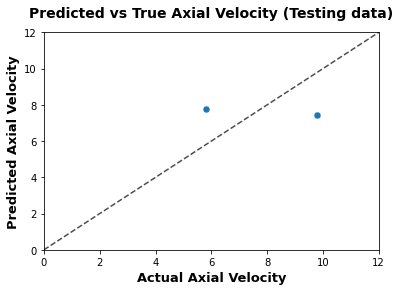

In [22]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot( x=y_test, y=lm_pred_test, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Testing data)',fontweight='bold',fontsize=14,pad=15) 

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")    
plt.savefig('LR_axial_test.png', dpi=300) 

# red_patch = mpatches.Patch(marker='*', label='The red data')
# plt.legend(handles=[red_patch])

# Random Forest Regression

In [23]:
mse = []
mae = []
r2 = []
for estimator in [x*100 for x in range(1,11)]:  
    rf = RandomForestRegressor(n_estimators=estimator,random_state=99)
    rf.fit(X_train,y_train)
    rf_Pred = rf.predict(X_test)
    mse.append(mean_squared_error(y_test,rf_Pred))
    mae.append(mean_absolute_error(y_test,rf_Pred))
    r2.append(r2_score(y_test,rf_Pred))

Text(0, 0.5, 'Mean Squared Error')

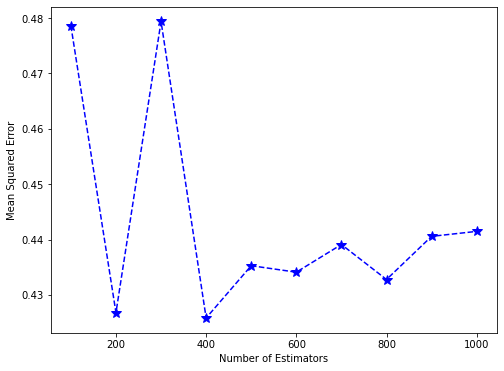

In [24]:
plt.figure(figsize=(8,6))
range_list = [x*100 for x in range(1,11)]
plt.plot(range_list,mse,color='blue', linestyle='dashed', marker='*', markersize=10)
# plt.title('Number of Estimators vs Mean Squared Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'Mean Absolute Error')

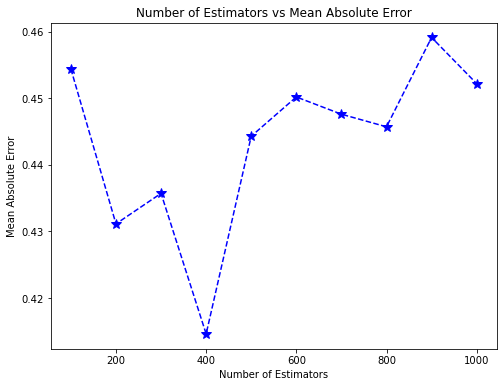

In [25]:
plt.figure(figsize=(8,6))
range_list = [x*100 for x in range(1,11)]
plt.plot(range_list,mae,color='blue', linestyle='dashed', marker='*', markersize=10)
plt.title('Number of Estimators vs Mean Absolute Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'R2 Score')

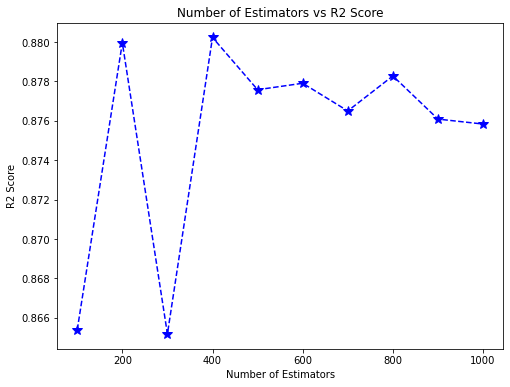

In [26]:
plt.figure(figsize=(8,6))
plt.plot(range_list,r2,color='blue', linestyle='dashed', marker='*', markersize=10)
plt.title('Number of Estimators vs R2 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('R2 Score')

In [27]:
# Using n_estimators as per previous step's findings
rf = RandomForestRegressor(n_estimators=200,random_state=99)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=99)

In [28]:
# Compute and print the training inputs, outputs and output predictions
rf_pred_train = rf.predict(X_train)
print((sc.inverse_transform(X_train)), y_train, rf_pred_train)

[[32.   2.  30.  10. ]
 [28.   1.8 32.5 11. ]
 [36.   1.8 32.5 11. ]
 [32.   2.4 35.  10. ]
 [28.   1.8 32.5  9. ]
 [32.   2.  35.  10. ]
 [36.   1.8 37.5 11. ]
 [36.   2.2 37.5 11. ]
 [36.   2.2 32.5 11. ]
 [32.   2.  35.  10. ]
 [36.   1.8 32.5  9. ]
 [28.   1.8 37.5  9. ]
 [36.   1.8 37.5  9. ]
 [28.   2.2 32.5  9. ]
 [32.   2.  35.   8. ]
 [36.   2.2 32.5  9. ]
 [32.   2.  40.  10. ]
 [32.   2.  35.  12. ]
 [24.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [32.   1.6 35.  10. ]
 [36.   2.2 37.5  9. ]
 [28.   2.2 32.5 11. ]
 [28.   2.2 37.5 11. ]
 [40.   2.  35.  10. ]
 [28.   2.2 37.5  9. ]] 22     8.6
8      9.1
9      8.7
21     4.8
0      9.4
26     9.8
13     5.5
15     5.3
11     6.0
17     9.8
1      9.1
4      8.2
5      7.8
2      7.9
24     6.6
3      6.4
23     6.4
25     4.6
18    10.3
28     9.9
20     7.3
7      5.4
10     6.6
14     5.6
19     7.2
6      6.3
Name: Zn(g/L), dtype: float64 [ 8.93466667  8.85983333  8.4425      5.44628333  9.1745      9.71592083
  6.38518333

In [29]:
# Compute and print the testing inputs, outputs and output predictions
rf_pred_test = rf.predict(X_test)
print((sc.inverse_transform(X_test)), y_test, rf_pred_test)

[[32.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [28.   1.8 37.5 11. ]] 27    9.8
16    9.8
12    5.8
Name: Zn(g/L), dtype: float64 [9.71592083 9.71592083 6.92526667]


In [30]:
# Compute and print the error metrics on training data
RFR_Train_R2 = r2_score (y_train, rf_pred_train)
RFR_Train_EVS = explained_variance_score (y_train, rf_pred_train)
RFR_Train_MSE = mean_squared_error(y_train, rf_pred_train)
RFR_Train_RMSE = np.sqrt(mean_squared_error(y_train, rf_pred_train))
RFR_Train_MAE = mean_absolute_error (y_train, rf_pred_train)
RFR_Train_MaxError = max_error (y_train, rf_pred_train)
RFR_Train_MSLE = mean_squared_log_error (y_train, rf_pred_train)
RFR_Train_MedAE = median_absolute_error (y_train, rf_pred_train)

print(RFR_Train_R2,RFR_Train_EVS,RFR_Train_MSE,RFR_Train_RMSE,RFR_Train_MAE,RFR_Train_MaxError,RFR_Train_MSLE,RFR_Train_MedAE)

0.8915294632887975 0.9096321329871639 0.31914727617916194 0.564931213670445 0.40855906593406527 1.6097452380952344 0.006018050650918765 0.2488333333333328


In [31]:
# Compute and print the error metrics on testing data
RFR_Test_R2 = r2_score (y_test, rf_pred_test)
RFR_Test_EVS = explained_variance_score (y_test, rf_pred_test)
RFR_Test_MSE = mean_squared_error(y_test, rf_pred_test)
RFR_Test_RMSE = np.sqrt(mean_squared_error(y_test, rf_pred_test))
RFR_Test_MAE = mean_absolute_error (y_test, rf_pred_test)
RFR_Test_MaxError = max_error (y_test, rf_pred_test)
RFR_Test_MSLE = mean_squared_log_error (y_test, rf_pred_test)
RFR_Test_MedAE = median_absolute_error (y_test, rf_pred_test)

print(RFR_Test_R2,RFR_Test_EVS,RFR_Test_MSE,RFR_Test_RMSE,RFR_Test_MAE,RFR_Test_MaxError,RFR_Test_MSLE,RFR_Test_MedAE)

0.8799659046582013 0.9085926659624523 0.4267878945486178 0.6532900539183325 0.43114166666668413 1.125266666666672 0.007857330311640499 0.08407916666669024


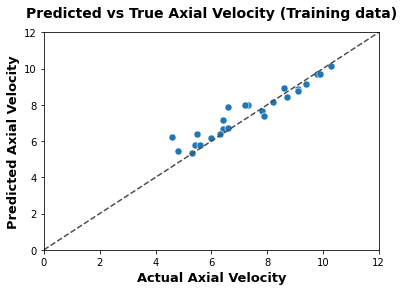

In [32]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_train, y=rf_pred_train, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Training data)',fontweight='bold',fontsize=14,pad=15) #Title of the second chart, pad for space between title and graph

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")               #### for diagonal line creation.
plt.savefig('RF_axial_train.png', dpi=300)            #### for saving the figure.

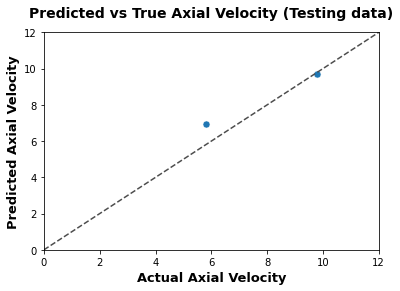

In [33]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot( x=y_test, y=rf_pred_test, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Testing data)',fontweight='bold',fontsize=14,pad=15) 

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")    
plt.savefig('RF_axial_test.png', dpi=300) 

# Support Vector Machines

### Strategy#1 to Optimize SVM using GridSearchCV

In [34]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid_SVM = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid_SVM.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-1.034 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.034 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.146 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-7.289 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-1.006 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.070 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.169 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.002 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-6.287 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-1.142 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [35]:
grid_SVM.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [36]:
grid_SVM.best_estimator_

SVR(C=100, gamma=0.1)

In [37]:
gridPred_SVM = grid_SVM.predict(X_test)

In [38]:
# Compute and print the training inputs, outputs and output predictions
gridPred_SVM_train = grid_SVM.predict(X_train)
print((sc.inverse_transform(X_train)), y_train, gridPred_SVM_train)

[[32.   2.  30.  10. ]
 [28.   1.8 32.5 11. ]
 [36.   1.8 32.5 11. ]
 [32.   2.4 35.  10. ]
 [28.   1.8 32.5  9. ]
 [32.   2.  35.  10. ]
 [36.   1.8 37.5 11. ]
 [36.   2.2 37.5 11. ]
 [36.   2.2 32.5 11. ]
 [32.   2.  35.  10. ]
 [36.   1.8 32.5  9. ]
 [28.   1.8 37.5  9. ]
 [36.   1.8 37.5  9. ]
 [28.   2.2 32.5  9. ]
 [32.   2.  35.   8. ]
 [36.   2.2 32.5  9. ]
 [32.   2.  40.  10. ]
 [32.   2.  35.  12. ]
 [24.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [32.   1.6 35.  10. ]
 [36.   2.2 37.5  9. ]
 [28.   2.2 32.5 11. ]
 [28.   2.2 37.5 11. ]
 [40.   2.  35.  10. ]
 [28.   2.2 37.5  9. ]] 22     8.6
8      9.1
9      8.7
21     4.8
0      9.4
26     9.8
13     5.5
15     5.3
11     6.0
17     9.8
1      9.1
4      8.2
5      7.8
2      7.9
24     6.6
3      6.4
23     6.4
25     4.6
18    10.3
28     9.9
20     7.3
7      5.4
10     6.6
14     5.6
19     7.2
6      6.3
Name: Zn(g/L), dtype: float64 [ 8.70039636  8.99983274  8.59991668  4.89992351  9.50050198  9.79951855
  5.60003015

In [39]:
# Compute and print the testing inputs, outputs and output predictions
gridPred_SVM_test = grid_SVM.predict(X_test)
print((sc.inverse_transform(X_test)), y_test, gridPred_SVM_test)

[[32.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [28.   1.8 37.5 11. ]] 27    9.8
16    9.8
12    5.8
Name: Zn(g/L), dtype: float64 [9.79951855 9.79951855 6.6008083 ]


In [40]:
# Compute and print the error metrics on training data
gSVM_Train_R2 = r2_score (y_train, gridPred_SVM_train)
gSVM_Train_EVS = explained_variance_score (y_train, gridPred_SVM_train)
gSVM_Train_MSE = mean_squared_error(y_train, gridPred_SVM_train)
gSVM_Train_RMSE = np.sqrt(mean_squared_error(y_train, gridPred_SVM_train))
gSVM_Train_MAE = mean_absolute_error (y_train, gridPred_SVM_train)
gSVM_Train_MaxError = max_error (y_train, gridPred_SVM_train)
gSVM_Train_MSLE = mean_squared_log_error (y_train, gridPred_SVM_train)
gSVM_Train_MedAE = median_absolute_error (y_train, gridPred_SVM_train)

print(gSVM_Train_R2,gSVM_Train_EVS,gSVM_Train_MSE,gSVM_Train_RMSE,gSVM_Train_MAE,gSVM_Train_MaxError,gSVM_Train_MSLE,gSVM_Train_MedAE)

0.9970683659176797 0.9971133108664167 0.008625596041970201 0.09287408703169146 0.08829073191524311 0.10050197850861053 0.00014223553298852492 0.10003004638202428


In [41]:
# Compute and print the error metrics on testing data
gSVM_Test_R2 = r2_score (y_test, gridPred_SVM_test)
gSVM_Test_EVS = explained_variance_score (y_test, gridPred_SVM_test)
gSVM_Test_MSE = mean_squared_error(y_test, gridPred_SVM_test)
gSVM_Test_RMSE = np.sqrt(mean_squared_error(y_test, gridPred_SVM_test))
gSVM_Test_MAE = mean_absolute_error (y_test, gridPred_SVM_test)
gSVM_Test_MaxError = max_error (y_test, gridPred_SVM_test)
gSVM_Test_MSLE = mean_squared_log_error (y_test, gridPred_SVM_test)
gSVM_Test_MedAE = median_absolute_error (y_test, gridPred_SVM_test)

print(gSVM_Test_R2,gSVM_Test_EVS,gSVM_Test_MSE,gSVM_Test_RMSE,gSVM_Test_MAE,gSVM_Test_MaxError,gSVM_Test_MSLE,gSVM_Test_MedAE)

0.9398786509726824 0.9598709219139626 0.21376479654157368 0.4623470520524314 0.2672570623302623 0.8008082954394586 0.0041316048874306364 0.0004814457756641133


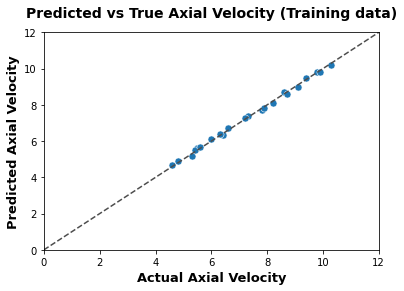

In [42]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_train, y=gridPred_SVM_train, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Training data)',fontweight='bold',fontsize=14,pad=15) 

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")    
plt.savefig('SVM_axial_train.png', dpi=300) 

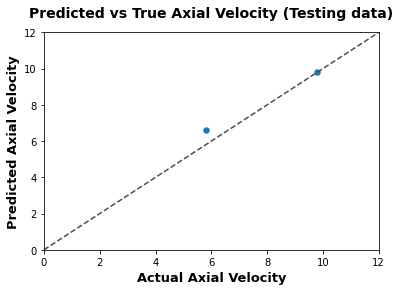

In [43]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_test, y=gridPred_SVM_test, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Testing data)',fontweight='bold',fontsize=14,pad=15) 

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")    
plt.savefig('SVM_axial_test.png', dpi=300)

In [44]:
# import shap
# shap.initjs()

# Ada Boost Regression

In [45]:
mse = []
mae = []
r2 = []
for estimator in [x*100 for x in range(1,11)]:  
    adb = AdaBoostRegressor(n_estimators=estimator,random_state=99)
    adb.fit(X_train,y_train)
    adb_Pred = adb.predict(X_test)
    mse.append(mean_squared_error(y_test,adb_Pred))
    mae.append(mean_absolute_error(y_test,adb_Pred))
    r2.append(r2_score(y_test,adb_Pred))

Text(0, 0.5, 'Mean Squared Error')

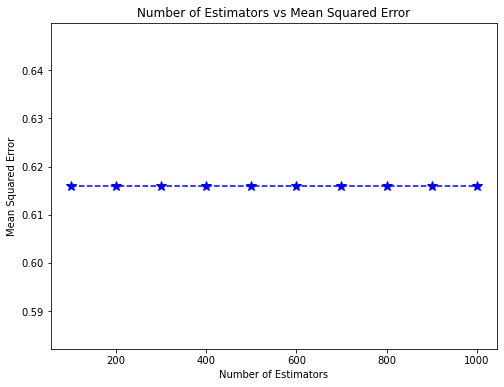

In [46]:
plt.figure(figsize=(8,6))
range_list = [x*100 for x in range(1,11)]
plt.plot(range_list,mse,color='blue', linestyle='dashed', marker='*', markersize=10)
plt.title('Number of Estimators vs Mean Squared Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'Mean Absolute Error')

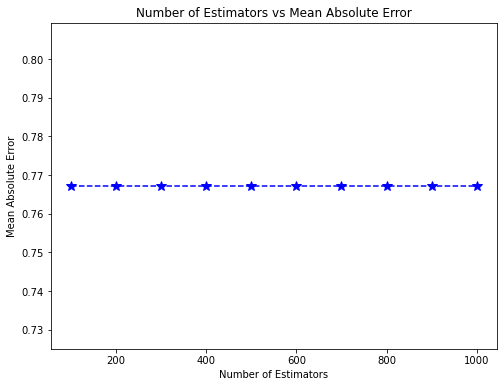

In [47]:
plt.figure(figsize=(8,6))
range_list = [x*100 for x in range(1,11)]
plt.plot(range_list,mae,color='blue', linestyle='dashed', marker='*', markersize=10)
plt.title('Number of Estimators vs Mean Absolute Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'R2 Score')

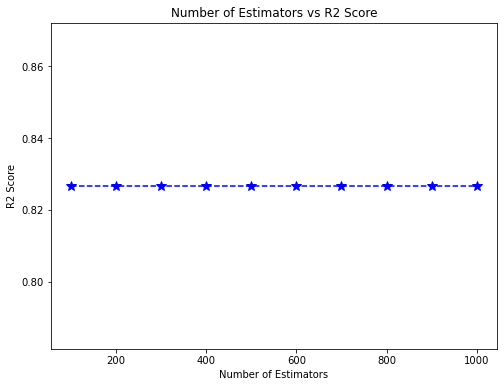

In [48]:
plt.figure(figsize=(8,6))
plt.plot(range_list,r2,color='blue', linestyle='dashed', marker='*', markersize=10)
plt.title('Number of Estimators vs R2 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('R2 Score')

In [49]:
# Using n_estimators=200 as per previous step's findings
adb = AdaBoostRegressor(n_estimators=100,random_state=99)
adb.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=100, random_state=99)

In [50]:
# Compute and print the training inputs, outputs and output predictions
adb_pred_train = adb.predict(X_train)
print((sc.inverse_transform(X_train)), y_train, adb_pred_train)

[[32.   2.  30.  10. ]
 [28.   1.8 32.5 11. ]
 [36.   1.8 32.5 11. ]
 [32.   2.4 35.  10. ]
 [28.   1.8 32.5  9. ]
 [32.   2.  35.  10. ]
 [36.   1.8 37.5 11. ]
 [36.   2.2 37.5 11. ]
 [36.   2.2 32.5 11. ]
 [32.   2.  35.  10. ]
 [36.   1.8 32.5  9. ]
 [28.   1.8 37.5  9. ]
 [36.   1.8 37.5  9. ]
 [28.   2.2 32.5  9. ]
 [32.   2.  35.   8. ]
 [36.   2.2 32.5  9. ]
 [32.   2.  40.  10. ]
 [32.   2.  35.  12. ]
 [24.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [32.   1.6 35.  10. ]
 [36.   2.2 37.5  9. ]
 [28.   2.2 32.5 11. ]
 [28.   2.2 37.5 11. ]
 [40.   2.  35.  10. ]
 [28.   2.2 37.5  9. ]] 22     8.6
8      9.1
9      8.7
21     4.8
0      9.4
26     9.8
13     5.5
15     5.3
11     6.0
17     9.8
1      9.1
4      8.2
5      7.8
2      7.9
24     6.6
3      6.4
23     6.4
25     4.6
18    10.3
28     9.9
20     7.3
7      5.4
10     6.6
14     5.6
19     7.2
6      6.3
Name: Zn(g/L), dtype: float64 [8.91578947 8.76428571 8.7        4.8        8.85714286 8.91578947
 5.56666667 5.5333

In [51]:
# Compute and print the testing inputs, outputs and output predictions
adb_pred_test = adb.predict(X_test)
print((sc.inverse_transform(X_test)), y_test, adb_pred_test)

[[32.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [28.   1.8 37.5 11. ]] 27    9.8
16    9.8
12    5.8
Name: Zn(g/L), dtype: float64 [8.91578947 8.91578947 6.33333333]


In [52]:
# Compute and print the error metrics on training data
AdBR_Train_R2 = r2_score (y_train, adb_pred_train)
AdBR_Train_EVS = explained_variance_score (y_train, adb_pred_train)
AdBR_Train_MSE = mean_squared_error(y_train, adb_pred_train)
AdBR_Train_RMSE = np.sqrt(mean_squared_error(y_train, adb_pred_train))
AdBR_Train_MAE = mean_absolute_error (y_train, adb_pred_train)
AdBR_Train_MaxError = max_error (y_train, adb_pred_train)
AdBR_Train_MSLE = mean_squared_log_error (y_train, adb_pred_train)
AdBR_Train_MedAE = median_absolute_error (y_train, adb_pred_train)

print(AdBR_Train_R2,AdBR_Train_EVS,AdBR_Train_MSE,AdBR_Train_RMSE,AdBR_Train_MAE,AdBR_Train_MaxError,AdBR_Train_MSLE,AdBR_Train_MedAE)

0.85435928784114 0.8543686228561043 0.4285111699045655 0.6546076457730734 0.520589164348393 1.3500000000000005 0.005324861472040902 0.41000000000000014


In [53]:
# Compute and print the error metrics on testing data
AdBR_Test_R2 = r2_score (y_test, adb_pred_test)
AdBR_Test_EVS = explained_variance_score (y_test, adb_pred_test)
AdBR_Test_MSE = mean_squared_error(y_test, adb_pred_test)
AdBR_Test_RMSE = np.sqrt(mean_squared_error(y_test, adb_pred_test))
AdBR_Test_MAE = mean_absolute_error (y_test, adb_pred_test)
AdBR_Test_MaxError = max_error (y_test, adb_pred_test)
AdBR_Test_MSLE = mean_squared_log_error (y_test, adb_pred_test)
AdBR_Test_MedAE = median_absolute_error (y_test, adb_pred_test)

print(AdBR_Test_R2,AdBR_Test_EVS,AdBR_Test_MSE,AdBR_Test_RMSE,AdBR_Test_MAE,AdBR_Test_MaxError,AdBR_Test_MSLE,AdBR_Test_MedAE)

0.826740535549399 0.8744105878731914 0.616033651379915 0.7848781124352462 0.7672514619883058 0.8842105263157922 0.006764591636767975 0.8842105263157922


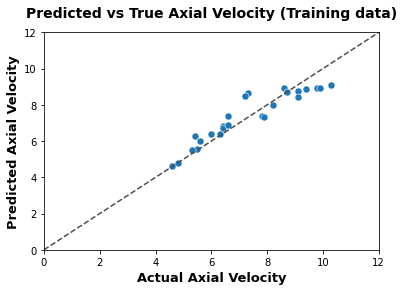

In [54]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_train, y=adb_pred_train, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Training data)',fontweight='bold',fontsize=14,pad=15) #Title of the second chart, pad for space between title and graph

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")               #### for diagonal line creation.
plt.savefig('ADB_axial_train.png', dpi=300)            #### for saving the figure.

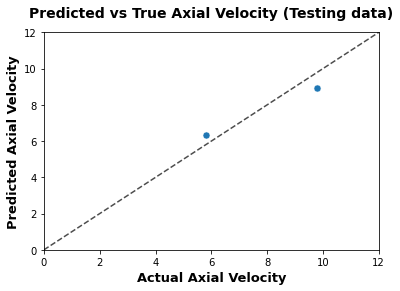

In [55]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_test, y=adb_pred_test, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Testing data)',fontweight='bold',fontsize=14,pad=15) #Title of the second chart, pad for space between title and graph

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")               #### for diagonal line creation.
plt.savefig('ADB_axial_test.png', dpi=300)            #### for saving the figure.

# MLP Regressor 

In [56]:
mse = []
mae = []
r2 = []
for iteration in [x*100 for x in range(1,11)]:  
    mlp = MLPRegressor(max_iter=iteration,random_state=99)
    mlp.fit(X_train,y_train)
    mlp_Pred = mlp.predict(X_test)
    mse.append(mean_squared_error(y_test,mlp_Pred))
    mae.append(mean_absolute_error(y_test,mlp_Pred))
    r2.append(r2_score(y_test,mlp_Pred))

Text(0, 0.5, 'Mean Squared Error')

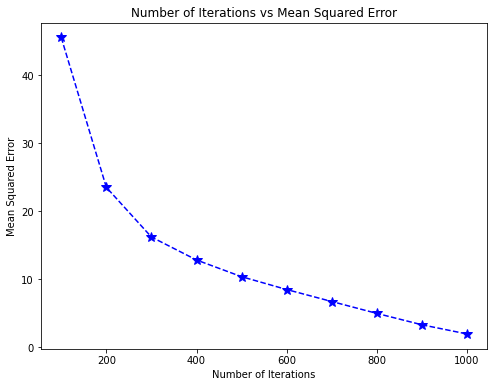

In [57]:
plt.figure(figsize=(8,6))
range_list = [x*100 for x in range(1,11)]
plt.plot(range_list,mse,color='blue', linestyle='dashed', marker='*', markersize=10)
plt.title('Number of Iterations vs Mean Squared Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'Mean Absolute Error')

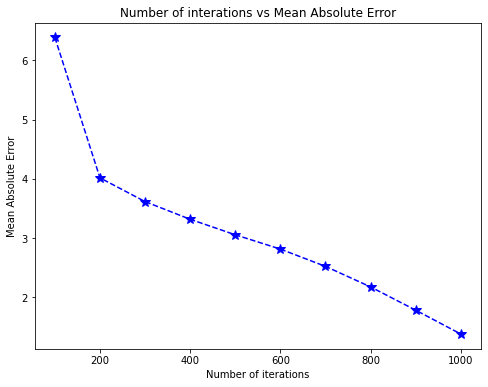

In [58]:
plt.figure(figsize=(8,6))
range_list = [x*100 for x in range(1,11)]
plt.plot(range_list,mae,color='blue', linestyle='dashed', marker='*', markersize=10)
plt.title('Number of interations vs Mean Absolute Error')
plt.xlabel('Number of iterations')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'R2 Score')

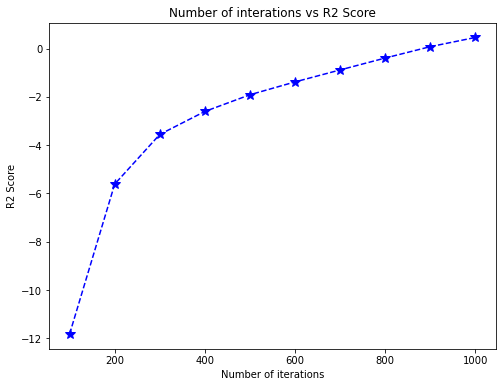

In [59]:
plt.figure(figsize=(8,6))
plt.plot(range_list,r2,color='blue', linestyle='dashed', marker='*', markersize=10)
plt.title('Number of interations vs R2 Score')
plt.xlabel('Number of iterations')
plt.ylabel('R2 Score')

In [60]:
# Using n_iterations as per previous step's findings
mlp = MLPRegressor(max_iter=400,random_state=99)
mlp.fit(X_train,y_train)

MLPRegressor(max_iter=400, random_state=99)

In [61]:
# Compute and print the training inputs, outputs and output predictions
mlp_pred_train = mlp.predict(X_train)
print((sc.inverse_transform(X_train)), y_train, mlp_pred_train)

[[32.   2.  30.  10. ]
 [28.   1.8 32.5 11. ]
 [36.   1.8 32.5 11. ]
 [32.   2.4 35.  10. ]
 [28.   1.8 32.5  9. ]
 [32.   2.  35.  10. ]
 [36.   1.8 37.5 11. ]
 [36.   2.2 37.5 11. ]
 [36.   2.2 32.5 11. ]
 [32.   2.  35.  10. ]
 [36.   1.8 32.5  9. ]
 [28.   1.8 37.5  9. ]
 [36.   1.8 37.5  9. ]
 [28.   2.2 32.5  9. ]
 [32.   2.  35.   8. ]
 [36.   2.2 32.5  9. ]
 [32.   2.  40.  10. ]
 [32.   2.  35.  12. ]
 [24.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [32.   1.6 35.  10. ]
 [36.   2.2 37.5  9. ]
 [28.   2.2 32.5 11. ]
 [28.   2.2 37.5 11. ]
 [40.   2.  35.  10. ]
 [28.   2.2 37.5  9. ]] 22     8.6
8      9.1
9      8.7
21     4.8
0      9.4
26     9.8
13     5.5
15     5.3
11     6.0
17     9.8
1      9.1
4      8.2
5      7.8
2      7.9
24     6.6
3      6.4
23     6.4
25     4.6
18    10.3
28     9.9
20     7.3
7      5.4
10     6.6
14     5.6
19     7.2
6      6.3
Name: Zn(g/L), dtype: float64 [9.20074919 9.29183769 7.93508491 5.17312367 9.99537916 5.53129482
 6.36273464 5.2849

In [62]:
# Compute and print the testing inputs, outputs and output predictions
mlp_pred_test = mlp.predict(X_test)
print((sc.inverse_transform(X_test)), y_test, mlp_pred_test)

[[32.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [28.   1.8 37.5 11. ]] 27    9.8
16    9.8
12    5.8
Name: Zn(g/L), dtype: float64 [5.53129482 5.53129482 7.21868643]


In [63]:
# Compute and print the error metrics on training data
MLPR_Train_R2 = r2_score (y_train, mlp_pred_train)
MLPR_Train_EVS = explained_variance_score (y_train, mlp_pred_train)
MLPR_Train_MSE = mean_squared_error(y_train, mlp_pred_train)
MLPR_Train_RMSE = np.sqrt(mean_squared_error(y_train, mlp_pred_train))
MLPR_Train_MAE = mean_absolute_error (y_train, mlp_pred_train)
MLPR_Train_MaxError = max_error (y_train, mlp_pred_train)
MLPR_Train_MSLE = mean_squared_log_error (y_train, mlp_pred_train)
MLPR_Train_MedAE = median_absolute_error (y_train, mlp_pred_train)

print(MLPR_Train_R2,MLPR_Train_EVS,MLPR_Train_MSE,MLPR_Train_RMSE,MLPR_Train_MAE,MLPR_Train_MaxError,MLPR_Train_MSLE,MLPR_Train_MedAE)

0.16130891536320624 0.17184535117402366 2.467637603105322 1.5708716061808876 0.9203126118978228 4.368705184098603 0.035045715743291406 0.4396061844375976


In [64]:
# Compute and print the error metrics on testing data
MLPR_Test_R2 = r2_score (y_test, mlp_pred_test)
MLPR_Test_EVS = explained_variance_score (y_test, mlp_pred_test)
MLPR_Test_MSE = mean_squared_error(y_test, mlp_pred_test)
MLPR_Test_RMSE = np.sqrt(mean_squared_error(y_test, mlp_pred_test))
MLPR_Test_MAE = mean_absolute_error (y_test, mlp_pred_test)
MLPR_Test_MaxError = max_error (y_test, mlp_pred_test)
MLPR_Test_MSLE = mean_squared_log_error (y_test, mlp_pred_test)
MLPR_Test_MedAE = median_absolute_error (y_test, mlp_pred_test)

print(MLPR_Test_R2,MLPR_Test_EVS,MLPR_Test_MSE,MLPR_Test_RMSE,MLPR_Test_MAE,MLPR_Test_MaxError,MLPR_Test_MSLE,MLPR_Test_MedAE)

-2.605283663735122 -1.0216514596736817 12.818786359947106 3.580333274982527 3.3186989322242546 4.268705184098604 0.18060158804001591 4.268705184098604


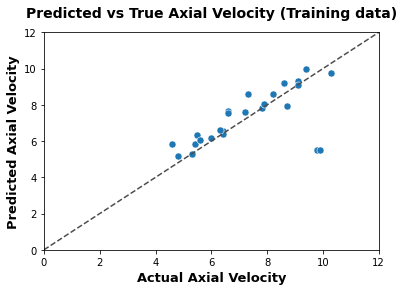

In [65]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_train, y=mlp_pred_train, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Training data)',fontweight='bold',fontsize=14,pad=15) #Title of the second chart, pad for space between title and graph

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")               #### for diagonal line creation.
plt.savefig('mlp_axial_train.png', dpi=300)            #### for saving the figure.

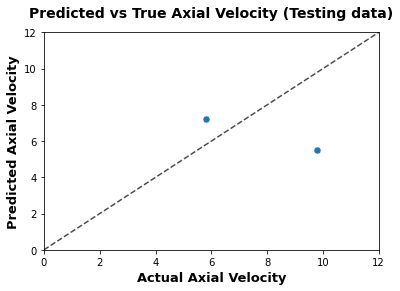

In [66]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_test, y=mlp_pred_test, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Testing data)',fontweight='bold',fontsize=14,pad=15) #Title of the second chart, pad for space between title and graph

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")               #### for diagonal line creation.
plt.savefig('mlp_axial_test.png', dpi=300)            #### for saving the figure.

# Gaussian Process Regressor

In [67]:
gpr = GaussianProcessRegressor(random_state=99)

In [68]:
gpr.fit(X_train,y_train)

GaussianProcessRegressor(random_state=99)

In [69]:
gpr_Pred = gpr.predict(X_test)

In [70]:
# Compute and print the training inputs, outputs and output predictions
gpr_pred_train = gpr.predict(X_train)
print((sc.inverse_transform(X_train)), y_train, gpr_pred_train)

[[32.   2.  30.  10. ]
 [28.   1.8 32.5 11. ]
 [36.   1.8 32.5 11. ]
 [32.   2.4 35.  10. ]
 [28.   1.8 32.5  9. ]
 [32.   2.  35.  10. ]
 [36.   1.8 37.5 11. ]
 [36.   2.2 37.5 11. ]
 [36.   2.2 32.5 11. ]
 [32.   2.  35.  10. ]
 [36.   1.8 32.5  9. ]
 [28.   1.8 37.5  9. ]
 [36.   1.8 37.5  9. ]
 [28.   2.2 32.5  9. ]
 [32.   2.  35.   8. ]
 [36.   2.2 32.5  9. ]
 [32.   2.  40.  10. ]
 [32.   2.  35.  12. ]
 [24.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [32.   1.6 35.  10. ]
 [36.   2.2 37.5  9. ]
 [28.   2.2 32.5 11. ]
 [28.   2.2 37.5 11. ]
 [40.   2.  35.  10. ]
 [28.   2.2 37.5  9. ]] 22     8.6
8      9.1
9      8.7
21     4.8
0      9.4
26     9.8
13     5.5
15     5.3
11     6.0
17     9.8
1      9.1
4      8.2
5      7.8
2      7.9
24     6.6
3      6.4
23     6.4
25     4.6
18    10.3
28     9.9
20     7.3
7      5.4
10     6.6
14     5.6
19     7.2
6      6.3
Name: Zn(g/L), dtype: float64 [ 8.60000001  9.09999998  8.7         4.80000001  9.40000001  9.83333325
  5.49999999

In [71]:
# Compute and print the testing inputs, outputs and output predictions
gpr_pred_test = gpr.predict(X_test)
print((sc.inverse_transform(X_test)), y_test, gpr_pred_test)

[[32.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [28.   1.8 37.5 11. ]] 27    9.8
16    9.8
12    5.8
Name: Zn(g/L), dtype: float64 [9.83333325 9.83333325 3.65165606]


In [72]:
# Compute and print the error metrics on training data
GPR_Train_R2 = r2_score (y_train, gpr_pred_train)
GPR_Train_EVS = explained_variance_score (y_train, gpr_pred_train)
GPR_Train_MSE = mean_squared_error(y_train, gpr_pred_train)
GPR_Train_RMSE = np.sqrt(mean_squared_error(y_train, gpr_pred_train))
GPR_Train_MAE = mean_absolute_error (y_train, gpr_pred_train)
GPR_Train_MaxError = max_error (y_train, gpr_pred_train)
GPR_Train_MSLE = mean_squared_log_error (y_train, gpr_pred_train)
GPR_Train_MedAE = median_absolute_error (y_train, gpr_pred_train)

print(GPR_Train_R2,GPR_Train_EVS,GPR_Train_MSE,GPR_Train_RMSE,GPR_Train_MAE,GPR_Train_MaxError,GPR_Train_MSLE,GPR_Train_MedAE)

0.999912852277907 0.9999128522779072 0.0002564102564111907 0.016012815380537886 0.0051282134193639806 0.06666674613952672 2.178131600134919e-06 1.1920929132713809e-08


In [73]:
# Compute and print the error metrics on testing data
GPR_Test_R2 = r2_score (y_test, gpr_pred_test)
GPR_Test_EVS = explained_variance_score (y_test, gpr_pred_test)
GPR_Test_MSE = mean_squared_error(y_test, gpr_pred_test)
GPR_Test_RMSE = np.sqrt(mean_squared_error(y_test, gpr_pred_test))
GPR_Test_MAE = mean_absolute_error (y_test, gpr_pred_test)
GPR_Test_MaxError = max_error (y_test, gpr_pred_test)
GPR_Test_MSLE = mean_squared_log_error (y_test, gpr_pred_test)
GPR_Test_MedAE = median_absolute_error (y_test, gpr_pred_test)

print(GPR_Test_R2,GPR_Test_EVS,GPR_Test_MSE,GPR_Test_RMSE,GPR_Test_MAE,GPR_Test_MaxError,GPR_Test_MSLE,GPR_Test_MedAE)

0.5670996353032787 0.7025177892465857 1.5392012966994544 1.2406455161324101 0.7383368154366806 2.148343938589096 0.04806352070239315 0.03333325386047292


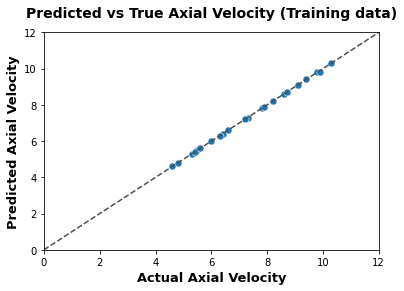

In [74]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_train, y=gpr_pred_train, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Training data)',fontweight='bold',fontsize=14,pad=15) #Title of the second chart, pad for space between title and graph

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")               #### for diagonal line creation.
plt.savefig('gpr_axial_train.png', dpi=300)            #### for saving the figure.

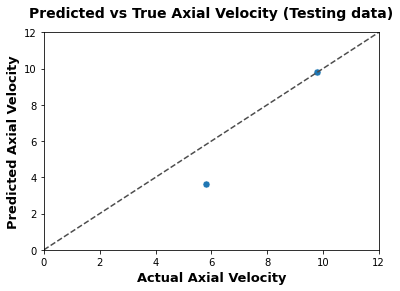

In [75]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_test, y=gpr_pred_test, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Testing data)',fontweight='bold',fontsize=14,pad=15) #Title of the second chart, pad for space between title and graph

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")               #### for diagonal line creation.
plt.savefig('gpr_axial_test.png', dpi=300)            #### for saving the figure.

# Gradient Boosting Regressor

In [76]:
mse = []
mae = []
r2 = []
for estimator in [x*100 for x in range(1,16)]:  
    gbf = GradientBoostingRegressor(n_estimators=estimator,random_state=99)
    gbf.fit(X_train,y_train)
    gbf_Pred = gbf.predict(X_test)
    mse.append(mean_squared_error(y_test,gbf_Pred))
    mae.append(mean_absolute_error(y_test,gbf_Pred))
    r2.append(r2_score(y_test,gbf_Pred))

Text(0, 0.5, 'Mean Squared Error')

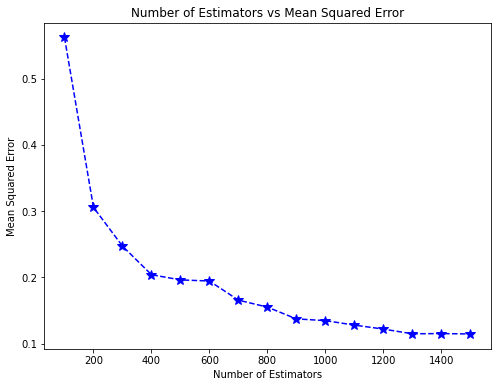

In [77]:
plt.figure(figsize=(8,6))
range_list = [x*100 for x in range(1,16)]
plt.plot(range_list,mse,color='blue', linestyle='dashed', marker='*', markersize=10)
plt.title('Number of Estimators vs Mean Squared Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'Mean Absolute Error')

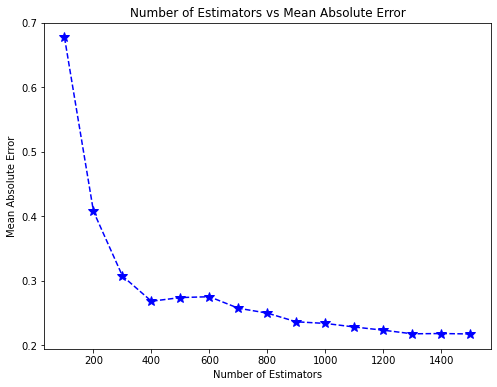

In [78]:
plt.figure(figsize=(8,6))
range_list = [x*100 for x in range(1,16)]
plt.plot(range_list,mae,color='blue', linestyle='dashed', marker='*', markersize=10)
plt.title('Number of Estimators vs Mean Absolute Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'R2 Score')

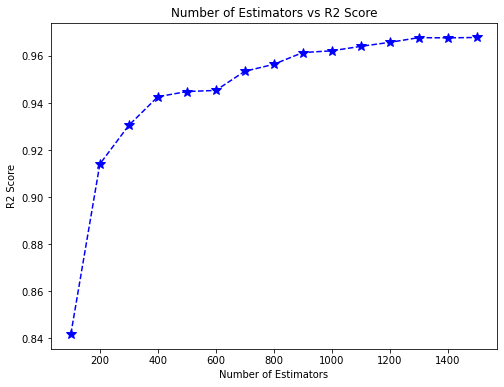

In [79]:
plt.figure(figsize=(8,6))
plt.plot(range_list,r2,color='blue', linestyle='dashed', marker='*', markersize=10)
plt.title('Number of Estimators vs R2 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('R2 Score')

In [80]:
# Using n_estimators as per previous step's findings
gbf = GradientBoostingRegressor(n_estimators=1000,random_state=99)
gbf.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=99)

In [81]:
# Compute and print the training inputs, outputs and output predictions
gbf_pred_train = gbf.predict(X_train)
print((sc.inverse_transform(X_train)), y_train, gbf_pred_train)

[[32.   2.  30.  10. ]
 [28.   1.8 32.5 11. ]
 [36.   1.8 32.5 11. ]
 [32.   2.4 35.  10. ]
 [28.   1.8 32.5  9. ]
 [32.   2.  35.  10. ]
 [36.   1.8 37.5 11. ]
 [36.   2.2 37.5 11. ]
 [36.   2.2 32.5 11. ]
 [32.   2.  35.  10. ]
 [36.   1.8 32.5  9. ]
 [28.   1.8 37.5  9. ]
 [36.   1.8 37.5  9. ]
 [28.   2.2 32.5  9. ]
 [32.   2.  35.   8. ]
 [36.   2.2 32.5  9. ]
 [32.   2.  40.  10. ]
 [32.   2.  35.  12. ]
 [24.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [32.   1.6 35.  10. ]
 [36.   2.2 37.5  9. ]
 [28.   2.2 32.5 11. ]
 [28.   2.2 37.5 11. ]
 [40.   2.  35.  10. ]
 [28.   2.2 37.5  9. ]] 22     8.6
8      9.1
9      8.7
21     4.8
0      9.4
26     9.8
13     5.5
15     5.3
11     6.0
17     9.8
1      9.1
4      8.2
5      7.8
2      7.9
24     6.6
3      6.4
23     6.4
25     4.6
18    10.3
28     9.9
20     7.3
7      5.4
10     6.6
14     5.6
19     7.2
6      6.3
Name: Zn(g/L), dtype: float64 [ 8.6004909   9.05090978  8.58307503  4.79950088  9.50246982  9.8333059
  5.66634511 

In [82]:
# Compute and print the testing inputs, outputs and output predictions
gbf_pred_test = gbf.predict(X_test)
print((sc.inverse_transform(X_test)), y_test, gbf_pred_test)

[[32.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [28.   1.8 37.5 11. ]] 27    9.8
16    9.8
12    5.8
Name: Zn(g/L), dtype: float64 [9.8333059  9.8333059  6.43364411]


In [83]:
# Compute and print the error metrics on training data
GBR_Train_R2 = r2_score (y_train, gbf_pred_train)
GBR_Train_EVS = explained_variance_score (y_train, gbf_pred_train)
GBR_Train_MSE = mean_squared_error(y_train, gbf_pred_train)
GBR_Train_RMSE = np.sqrt(mean_squared_error(y_train, gbf_pred_train))
GBR_Train_MAE = mean_absolute_error (y_train, gbf_pred_train)
GBR_Train_MaxError = max_error (y_train, gbf_pred_train)
GBR_Train_MSLE = mean_squared_log_error (y_train, gbf_pred_train)
GBR_Train_MedAE = median_absolute_error (y_train, gbf_pred_train)

print(GBR_Train_R2,GBR_Train_EVS,GBR_Train_MSE,GBR_Train_RMSE,GBR_Train_MAE,GBR_Train_MaxError,GBR_Train_MSLE,GBR_Train_MedAE)

0.9980105370091787 0.9980105370091787 0.005853494541751251 0.07650813382739936 0.05632245158677833 0.16634510740599406 9.673090929023651e-05 0.048829608989606754


In [84]:
# Compute and print the error metrics on testing data
GBR_Test_R2 = r2_score (y_test, gbf_pred_test)
GBR_Test_EVS = explained_variance_score (y_test, gbf_pred_test)
GBR_Test_MSE = mean_squared_error(y_test, gbf_pred_test)
GBR_Test_RMSE = np.sqrt(mean_squared_error(y_test, gbf_pred_test))
GBR_Test_MAE = mean_absolute_error (y_test, gbf_pred_test)
GBR_Test_MaxError = max_error (y_test, gbf_pred_test)
GBR_Test_MSLE = mean_squared_log_error (y_test, gbf_pred_test)
GBR_Test_MedAE = median_absolute_error (y_test, gbf_pred_test)

print(GBR_Test_R2,GBR_Test_EVS,GBR_Test_MSE,GBR_Test_RMSE,GBR_Test_MAE,GBR_Test_MaxError,GBR_Test_MSLE,GBR_Test_MedAE)

0.9621509289969873 0.9774746268063987 0.1345744746773784 0.3668439377683355 0.23341863438446206 0.6336441103338855 0.0026522096913172157 0.033305896409750346


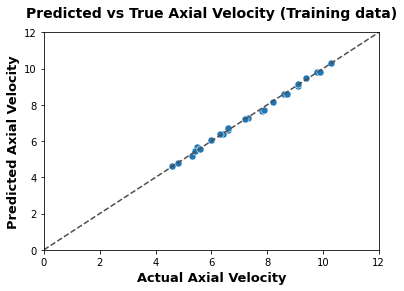

In [85]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_train, y=gbf_pred_train, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Training data)',fontweight='bold',fontsize=14,pad=15) #Title of the second chart, pad for space between title and graph

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")               #### for diagonal line creation.
plt.savefig('gbf_axial_train.png', dpi=300)            #### for saving the figure.

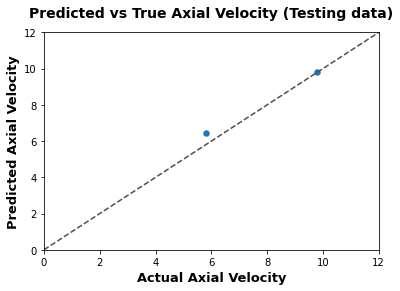

In [86]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot( x=y_test, y=gbf_pred_test, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Testing data)',fontweight='bold',fontsize=14,pad=15) 

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")    
plt.savefig('gbf_axial_test.png', dpi=300) 

# Decision Tree Regressor

In [87]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [88]:
dtr_pred_train = dtr.predict(X_train)
print((sc.inverse_transform(X_train)), y_train, dtr_pred_train)

[[32.   2.  30.  10. ]
 [28.   1.8 32.5 11. ]
 [36.   1.8 32.5 11. ]
 [32.   2.4 35.  10. ]
 [28.   1.8 32.5  9. ]
 [32.   2.  35.  10. ]
 [36.   1.8 37.5 11. ]
 [36.   2.2 37.5 11. ]
 [36.   2.2 32.5 11. ]
 [32.   2.  35.  10. ]
 [36.   1.8 32.5  9. ]
 [28.   1.8 37.5  9. ]
 [36.   1.8 37.5  9. ]
 [28.   2.2 32.5  9. ]
 [32.   2.  35.   8. ]
 [36.   2.2 32.5  9. ]
 [32.   2.  40.  10. ]
 [32.   2.  35.  12. ]
 [24.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [32.   1.6 35.  10. ]
 [36.   2.2 37.5  9. ]
 [28.   2.2 32.5 11. ]
 [28.   2.2 37.5 11. ]
 [40.   2.  35.  10. ]
 [28.   2.2 37.5  9. ]] 22     8.6
8      9.1
9      8.7
21     4.8
0      9.4
26     9.8
13     5.5
15     5.3
11     6.0
17     9.8
1      9.1
4      8.2
5      7.8
2      7.9
24     6.6
3      6.4
23     6.4
25     4.6
18    10.3
28     9.9
20     7.3
7      5.4
10     6.6
14     5.6
19     7.2
6      6.3
Name: Zn(g/L), dtype: float64 [ 8.6         9.1         8.7         4.8         9.4         9.83333333
  5.5       

In [89]:
dtr_pred_test = dtr.predict(X_test)
print((sc.inverse_transform(X_test)), y_test, dtr_pred_test)

[[32.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [28.   1.8 37.5 11. ]] 27    9.8
16    9.8
12    5.8
Name: Zn(g/L), dtype: float64 [9.83333333 9.83333333 5.5       ]


In [90]:
# Compute and print the error metrics on training data
DTR_Train_R2 = r2_score (y_train, dtr_pred_train)
DTR_Train_EVS = explained_variance_score (y_train, dtr_pred_train)
DTR_Train_MSE = mean_squared_error(y_train, dtr_pred_train)
DTR_Train_RMSE = np.sqrt(mean_squared_error(y_train, dtr_pred_train))
DTR_Train_MAE = mean_absolute_error (y_train, dtr_pred_train)
DTR_Train_MaxError = max_error (y_train, dtr_pred_train)
DTR_Train_MSLE = mean_squared_log_error (y_train, dtr_pred_train)
DTR_Train_MedAE = median_absolute_error (y_train, dtr_pred_train)

print(DTR_Train_R2,DTR_Train_EVS,DTR_Train_MSE,DTR_Train_RMSE,DTR_Train_MAE,DTR_Train_MaxError,DTR_Train_MSLE,DTR_Train_MedAE)

0.9999128522779074 0.9999128522779074 0.0002564102564102546 0.01601281538050866 0.00512820512820511 0.06666666666666643 2.178131616119699e-06 0.0


In [91]:
# Compute and print the error metrics on testing data
DTR_Test_R2 = r2_score (y_test, dtr_pred_test)
DTR_Test_EVS = explained_variance_score (y_test, dtr_pred_test)
DTR_Test_MSE = mean_squared_error(y_test, dtr_pred_test)
DTR_Test_RMSE = np.sqrt(mean_squared_error(y_test, dtr_pred_test))
DTR_Test_MAE = mean_absolute_error (y_test, dtr_pred_test)
DTR_Test_MaxError = max_error (y_test, dtr_pred_test)
DTR_Test_MSLE = mean_squared_log_error (y_test, dtr_pred_test)
DTR_Test_MedAE = median_absolute_error (y_test, dtr_pred_test)

print(DTR_Test_R2,DTR_Test_EVS,DTR_Test_MSE,DTR_Test_RMSE,DTR_Test_MAE,DTR_Test_MaxError,DTR_Test_MSLE,DTR_Test_MedAE)

0.9913541666666666 0.9930555555555556 0.030740740740740704 0.17533037597843878 0.12222222222222208 0.2999999999999998 0.00068494900573154 0.033333333333333215


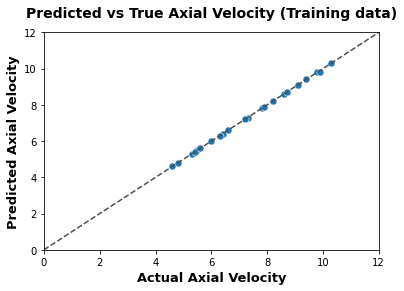

In [92]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_train, y=dtr_pred_train, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Training data)',fontweight='bold',fontsize=14,pad=15) #Title of the second chart, pad for space between title and graph

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")               #### for diagonal line creation.
plt.savefig('dtr_axial_train.png', dpi=300)            #### for saving the figure.

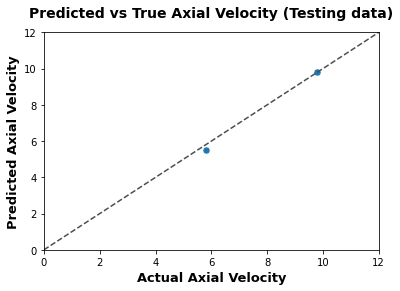

In [93]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot( x=y_test, y=dtr_pred_test, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Testing data)',fontweight='bold',fontsize=14,pad=15) 

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")    
plt.savefig('dtr_axial_test.png', dpi=300) 

# Hist Gradient Boosting Regressor

In [94]:
hgbr = HistGradientBoostingRegressor(random_state=0)
hgbr.fit(X_train,y_train)

HistGradientBoostingRegressor(random_state=0)

In [95]:
hgbr_pred_train = hgbr.predict(X_train)
print((sc.inverse_transform(X_train)), y_train, hgbr_pred_train)

[[32.   2.  30.  10. ]
 [28.   1.8 32.5 11. ]
 [36.   1.8 32.5 11. ]
 [32.   2.4 35.  10. ]
 [28.   1.8 32.5  9. ]
 [32.   2.  35.  10. ]
 [36.   1.8 37.5 11. ]
 [36.   2.2 37.5 11. ]
 [36.   2.2 32.5 11. ]
 [32.   2.  35.  10. ]
 [36.   1.8 32.5  9. ]
 [28.   1.8 37.5  9. ]
 [36.   1.8 37.5  9. ]
 [28.   2.2 32.5  9. ]
 [32.   2.  35.   8. ]
 [36.   2.2 32.5  9. ]
 [32.   2.  40.  10. ]
 [32.   2.  35.  12. ]
 [24.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [32.   1.6 35.  10. ]
 [36.   2.2 37.5  9. ]
 [28.   2.2 32.5 11. ]
 [28.   2.2 37.5 11. ]
 [40.   2.  35.  10. ]
 [28.   2.2 37.5  9. ]] 22     8.6
8      9.1
9      8.7
21     4.8
0      9.4
26     9.8
13     5.5
15     5.3
11     6.0
17     9.8
1      9.1
4      8.2
5      7.8
2      7.9
24     6.6
3      6.4
23     6.4
25     4.6
18    10.3
28     9.9
20     7.3
7      5.4
10     6.6
14     5.6
19     7.2
6      6.3
Name: Zn(g/L), dtype: float64 [7.40769231 7.40769231 7.40769231 7.40769231 7.40769231 7.40769231
 7.40769231 7.4076

In [96]:
hgbr_pred_test = hgbr.predict(X_test)
print((sc.inverse_transform(X_test)), y_test, hgbr_pred_test)

[[32.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [28.   1.8 37.5 11. ]] 27    9.8
16    9.8
12    5.8
Name: Zn(g/L), dtype: float64 [7.40769231 7.40769231 7.40769231]


In [97]:
# Compute and print the error metrics on training data
HGBR_Train_R2 = r2_score (y_train, hgbr_pred_train)
HGBR_Train_EVS = explained_variance_score (y_train, hgbr_pred_train)
HGBR_Train_MSE = mean_squared_error(y_train, hgbr_pred_train)
HGBR_Train_RMSE = np.sqrt(mean_squared_error(y_train, hgbr_pred_train))
HGBR_Train_MAE = mean_absolute_error (y_train, hgbr_pred_train)
HGBR_Train_MaxError = max_error (y_train, hgbr_pred_train)
HGBR_Train_MSLE = mean_squared_log_error (y_train, hgbr_pred_train)
HGBR_Train_MedAE = median_absolute_error (y_train, hgbr_pred_train)

print(HGBR_Train_R2,HGBR_Train_EVS,HGBR_Train_MSE,HGBR_Train_RMSE,HGBR_Train_MAE,HGBR_Train_MaxError,HGBR_Train_MSLE,HGBR_Train_MedAE)

0.0 0.0 2.9422485207100597 1.7152983765835201 1.5159763313609464 2.8923076923076936 0.04373249245442255 1.5499999999999998


In [98]:
# Compute and print the error metrics on testing data
HGBR_Test_R2 = r2_score (y_test, hgbr_pred_test)
HGBR_Test_EVS = explained_variance_score (y_test, hgbr_pred_test)
HGBR_Test_MSE = mean_squared_error(y_test, hgbr_pred_test)
HGBR_Test_RMSE = np.sqrt(mean_squared_error(y_test, hgbr_pred_test))
HGBR_Test_MAE = mean_absolute_error (y_test, hgbr_pred_test)
HGBR_Test_MaxError = max_error (y_test, hgbr_pred_test)
HGBR_Test_MSLE = mean_squared_log_error (y_test, hgbr_pred_test)
HGBR_Test_MedAE = median_absolute_error (y_test, hgbr_pred_test)

print(HGBR_Test_R2,HGBR_Test_EVS,HGBR_Test_MSE,HGBR_Test_RMSE,HGBR_Test_MAE,HGBR_Test_MaxError,HGBR_Test_MSLE,HGBR_Test_MedAE)

-0.3154012573964502 1.1102230246251565e-16 4.676982248520714 2.162633174748023 2.1307692307692316 2.3923076923076936 0.05681287392013984 2.3923076923076936


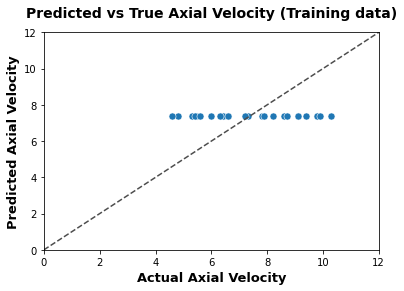

In [99]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_train, y=hgbr_pred_train, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Training data)',fontweight='bold',fontsize=14,pad=15) #Title of the second chart, pad for space between title and graph

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")               #### for diagonal line creation.
plt.savefig('hgbr_axial_train.png', dpi=300)            #### for saving the figure.

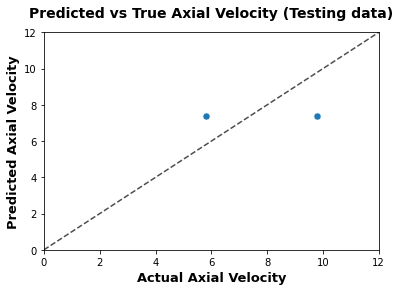

In [100]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot( x=y_test, y=hgbr_pred_test, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Testing data)',fontweight='bold',fontsize=14,pad=15) 

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")    
plt.savefig('hgbr_axial_test.png', dpi=300) 

# XGBoost Regressor

In [101]:
xgb = XGBRegressor(random_state=0)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [102]:
xgb_pred_train = xgb.predict(X_train)
print((sc.inverse_transform(X_train)), y_train, xgb_pred_train)

[[32.   2.  30.  10. ]
 [28.   1.8 32.5 11. ]
 [36.   1.8 32.5 11. ]
 [32.   2.4 35.  10. ]
 [28.   1.8 32.5  9. ]
 [32.   2.  35.  10. ]
 [36.   1.8 37.5 11. ]
 [36.   2.2 37.5 11. ]
 [36.   2.2 32.5 11. ]
 [32.   2.  35.  10. ]
 [36.   1.8 32.5  9. ]
 [28.   1.8 37.5  9. ]
 [36.   1.8 37.5  9. ]
 [28.   2.2 32.5  9. ]
 [32.   2.  35.   8. ]
 [36.   2.2 32.5  9. ]
 [32.   2.  40.  10. ]
 [32.   2.  35.  12. ]
 [24.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [32.   1.6 35.  10. ]
 [36.   2.2 37.5  9. ]
 [28.   2.2 32.5 11. ]
 [28.   2.2 37.5 11. ]
 [40.   2.  35.  10. ]
 [28.   2.2 37.5  9. ]] 22     8.6
8      9.1
9      8.7
21     4.8
0      9.4
26     9.8
13     5.5
15     5.3
11     6.0
17     9.8
1      9.1
4      8.2
5      7.8
2      7.9
24     6.6
3      6.4
23     6.4
25     4.6
18    10.3
28     9.9
20     7.3
7      5.4
10     6.6
14     5.6
19     7.2
6      6.3
Name: Zn(g/L), dtype: float64 [ 8.601153   9.094175   8.700713   4.799954   9.411      9.832298
  5.502918   5.2973

In [103]:
xgb_pred_test = xgb.predict(X_test)
print((sc.inverse_transform(X_test)), y_test, xgb_pred_test)

[[32.   2.  35.  10. ]
 [32.   2.  35.  10. ]
 [28.   1.8 37.5 11. ]] 27    9.8
16    9.8
12    5.8
Name: Zn(g/L), dtype: float64 [9.832298  9.832298  5.9016843]


In [104]:
# Compute and print the error metrics on training data
XGBR_Train_R2 = r2_score (y_train, xgb_pred_train)
XGBR_Train_EVS = explained_variance_score (y_train, xgb_pred_train)
XGBR_Train_MSE = mean_squared_error(y_train, xgb_pred_train)
XGBR_Train_RMSE = np.sqrt(mean_squared_error(y_train, xgb_pred_train))
XGBR_Train_MAE = mean_absolute_error (y_train, xgb_pred_train)
XGBR_Train_MaxError = max_error (y_train, xgb_pred_train)
XGBR_Train_MSLE = mean_squared_log_error (y_train, xgb_pred_train)
XGBR_Train_MedAE = median_absolute_error (y_train, xgb_pred_train)

print(XGBR_Train_R2,XGBR_Train_EVS,XGBR_Train_MSE,XGBR_Train_RMSE,XGBR_Train_MAE,XGBR_Train_MaxError,XGBR_Train_MSLE,XGBR_Train_MedAE)

0.9999070558863324 0.9999070558865518 0.00027346468094702247 0.016536767548315557 0.007803759208092227 0.0677017211914066 2.3961285057043144e-06 0.001926755905151456


In [105]:
# Compute and print the error metrics on testing data
XGBR_Test_R2 = r2_score (y_test, xgb_pred_test)
XGBR_Test_EVS = explained_variance_score (y_test, xgb_pred_test)
XGBR_Test_MSE = mean_squared_error(y_test, xgb_pred_test)
XGBR_Test_RMSE = np.sqrt(mean_squared_error(y_test, xgb_pred_test))
XGBR_Test_MAE = mean_absolute_error (y_test, xgb_pred_test)
XGBR_Test_MaxError = max_error (y_test, xgb_pred_test)
XGBR_Test_MSLE = mean_squared_log_error (y_test, xgb_pred_test)
XGBR_Test_MedAE = median_absolute_error (y_test, xgb_pred_test)

print(XGBR_Test_R2,XGBR_Test_EVS,XGBR_Test_MSE,XGBR_Test_RMSE,XGBR_Test_MAE,XGBR_Test_MaxError,XGBR_Test_MSLE,XGBR_Test_MedAE)

0.9988350576921872 0.9996990988909005 0.004142017094445673 0.06435850444537748 0.05542694727579711 0.10168428421020526 7.938150678263919e-05 0.03229827880859304


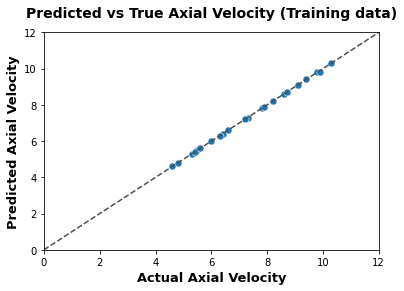

In [106]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot(x=y_train, y=xgb_pred_train, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Training data)',fontweight='bold',fontsize=14,pad=15) #Title of the second chart, pad for space between title and graph

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")               #### for diagonal line creation.
plt.savefig('xgb_axial_train.png', dpi=300)            #### for saving the figure.

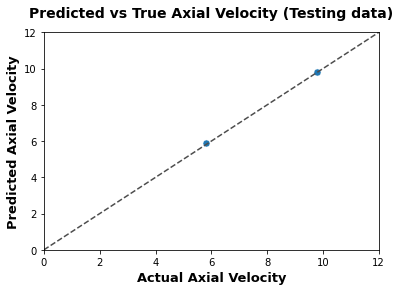

In [107]:
plt.xlim(0,12)
plt.ylim(0,12) # don't set it initially, only after running it once in default mode
sns.scatterplot( x=y_test, y=xgb_pred_test, marker="o", s=50)
plt.title('Predicted vs True Axial Velocity (Testing data)',fontweight='bold',fontsize=14,pad=15) 

plt.xlabel('Actual Axial Velocity',fontweight='bold',fontsize=13) 
plt.ylabel('Predicted Axial Velocity',fontweight='bold',fontsize=13)

plt.plot([0,12], [0,12], ls="--", c=".3")    
plt.savefig('xgb_axial_test.png', dpi=300) 

# Report

In [108]:
modellists1 = []

modellists1.append(['Train','LR','Linear Regression', LR_Train_R2,LR_Train_EVS,LR_Train_MSE,LR_Train_RMSE,LR_Train_MAE,LR_Train_MaxError,LR_Train_MSLE,LR_Train_MedAE])
modellists1.append(['Train','RFR','Random Forest Regression',RFR_Train_R2,RFR_Train_EVS,RFR_Train_MSE,RFR_Train_RMSE,RFR_Train_MAE,RFR_Train_MaxError,RFR_Train_MSLE,RFR_Train_MedAE])
modellists1.append(['Train','SVR','Support Vector Regression', gSVM_Train_R2,gSVM_Train_EVS,gSVM_Train_MSE,gSVM_Train_RMSE,gSVM_Train_MAE,gSVM_Train_MaxError,gSVM_Train_MSLE,gSVM_Train_MedAE])
modellists1.append(['Train','ABR','AdaBoost Regression', AdBR_Train_R2,AdBR_Train_EVS,AdBR_Train_MSE,AdBR_Train_RMSE,AdBR_Train_MAE,AdBR_Train_MaxError,AdBR_Train_MSLE,AdBR_Train_MedAE])
modellists1.append(['Train','MLP','Multi-layer Perceptron', MLPR_Train_R2,MLPR_Train_EVS,MLPR_Train_MSE,MLPR_Train_RMSE,MLPR_Train_MAE,MLPR_Train_MaxError,MLPR_Train_MSLE,MLPR_Train_MedAE])
modellists1.append(['Train','GPR','Gaussian Process Regression', GPR_Train_R2,GPR_Train_EVS,GPR_Train_MSE,GPR_Train_RMSE,GPR_Train_MAE,GPR_Train_MaxError,GPR_Train_MSLE,GPR_Train_MedAE])
modellists1.append(['Train','GBR','Gradient Boosting Regression', GBR_Train_R2,GBR_Train_EVS,GBR_Train_MSE,GBR_Train_RMSE,GBR_Train_MAE,GBR_Train_MaxError,GBR_Train_MSLE,GBR_Train_MedAE])
modellists1.append(['Train','DTR','Decision Tree Regression', DTR_Train_R2,DTR_Train_EVS,DTR_Train_MSE,DTR_Train_RMSE,DTR_Train_MAE,DTR_Train_MaxError,DTR_Train_MSLE,DTR_Train_MedAE])
modellists1.append(['Train','HGBR','Hist Gradient Boosting Regression',HGBR_Train_R2,HGBR_Train_EVS,HGBR_Train_MSE,HGBR_Train_RMSE,HGBR_Train_MAE,HGBR_Train_MaxError,HGBR_Train_MSLE,HGBR_Train_MedAE])
modellists1.append(['Train','XGBR','XGBoost Regression', XGBR_Train_R2,XGBR_Train_EVS,XGBR_Train_MSE,XGBR_Train_RMSE,XGBR_Train_MAE,XGBR_Train_MaxError,XGBR_Train_MSLE,XGBR_Train_MedAE])


modellists1.append(['Test','LR','Linear Regression', LR_Test_R2,LR_Test_EVS,LR_Test_MSE,LR_Test_RMSE,LR_Test_MAE,LR_Test_MaxError,LR_Test_MSLE,LR_Test_MedAE])
modellists1.append(['Test','RFR','Random Forest Regression',RFR_Test_R2,RFR_Test_EVS,RFR_Test_MSE,RFR_Test_RMSE,RFR_Test_MAE,RFR_Test_MaxError,RFR_Test_MSLE,RFR_Test_MedAE])
modellists1.append(['Test','SVR','Support Vector Regression', gSVM_Test_R2,gSVM_Test_EVS,gSVM_Test_MSE,gSVM_Test_RMSE,gSVM_Test_MAE,gSVM_Test_MaxError,gSVM_Test_MSLE,gSVM_Test_MedAE])
modellists1.append(['Test','ABR','AdaBoost Regression', AdBR_Test_R2,AdBR_Test_EVS,AdBR_Test_MSE,AdBR_Test_RMSE,AdBR_Test_MAE,AdBR_Test_MaxError,AdBR_Test_MSLE,AdBR_Test_MedAE])
modellists1.append(['Test','MLP','Multi-layer Perceptron', MLPR_Test_R2,MLPR_Test_EVS,MLPR_Test_MSE,MLPR_Test_RMSE,MLPR_Test_MAE,MLPR_Test_MaxError,MLPR_Test_MSLE,MLPR_Test_MedAE])
modellists1.append(['Test','GPR','Gaussian Process Regression', GPR_Test_R2,GPR_Test_EVS,GPR_Test_MSE,GPR_Test_RMSE,GPR_Test_MAE,GPR_Test_MaxError,GPR_Test_MSLE,GPR_Test_MedAE])
modellists1.append(['Test','GBR','Gradient Boosting Regression',GBR_Test_R2,GBR_Test_EVS,GBR_Test_MSE,GBR_Test_RMSE,GBR_Test_MAE,GBR_Test_MaxError,GBR_Test_MSLE,GBR_Test_MedAE])
modellists1.append(['Test','DTR','Decision Tree Regression', DTR_Test_R2,DTR_Test_EVS,DTR_Test_MSE,DTR_Test_RMSE,DTR_Test_MAE,DTR_Test_MaxError,DTR_Test_MSLE,DTR_Test_MedAE])
modellists1.append(['Test','HGBR','Hist Gradient Boosting Regression',HGBR_Test_R2,HGBR_Test_EVS,HGBR_Test_MSE,HGBR_Test_RMSE,HGBR_Test_MAE,HGBR_Test_MaxError,HGBR_Test_MSLE,HGBR_Test_MedAE])
modellists1.append(['Test','XGBR','XGBoost Regression', XGBR_Test_R2,XGBR_Test_EVS,XGBR_Test_MSE,XGBR_Test_RMSE,XGBR_Test_MAE,XGBR_Test_MaxError,XGBR_Test_MSLE,XGBR_Test_MedAE])


model_df1 = pd.DataFrame(modellists1, columns = ['Data','Symbol','Model', 'R2', 'EVS', 'MSE', 'RMSE','MAE', 'MaxError', 'MSLE', 'MedAE'])
model_df1

,Data,Symbol,Model,R2,EVS,MSE,RMSE,MAE,MaxError,MSLE,MedAE
0,Train,LR,Linear Regression,0.518848,5.188483e-01,1.415668,1.189818,0.908795,2.479070,0.019213,6.071705e-01
1,Train,RFR,Random Forest Regression,0.891529,9.096321e-01,0.319147,0.564931,0.408559,1.609745,0.006018,2.488333e-01
2,Train,SVR,Support Vector Regression,0.997068,9.971133e-01,0.008626,0.092874,0.088291,0.100502,0.000142,1.000300e-01
3,Train,ABR,AdaBoost Regression,0.854359,8.543686e-01,0.428511,0.654608,0.520589,1.350000,0.005325,4.100000e-01
4,Train,MLP,Multi-layer Perceptron,0.161309,1.718454e-01,2.467638,1.570872,0.920313,4.368705,0.035046,4.396062e-01
5,Train,GPR,Gaussian Process Regression,0.999913,9.999129e-01,0.000256,0.016013,0.005128,0.066667,0.000002,1.192093e-08
6,Train,GBR,Gradient Boosting Regression,0.998011,9.980105e-01,0.005853,0.076508,0.056322,0.166345,0.000097,4.882961e-02
7,Train,DTR,Decision Tree Regression,0.999913,9.999129e-01,0.000256,0.016013,0.005128,0.066667,0.000002,0.000000e+00
8,Train,HGBR,Hist Gradient Boosting Regression,0.000000,0.000000e+00,2.942249,1.715298,1.515976,2.892308,0.043732,1.550000e+00
9,Train,XGBR,XGBoost Regression,0.999907,9.999071e-01,0.000273,0.016537,0.007804,0.067702,0.000002,1.926756e-03
